In [1]:
%load_ext autoreload
%autoreload 2

import sys

sys.path.append("../")

import matplotlib.pyplot as plt
from matplotlib_sankey import sankey, from_matrix

<Axes: title={'center': 'Sankey plot'}>

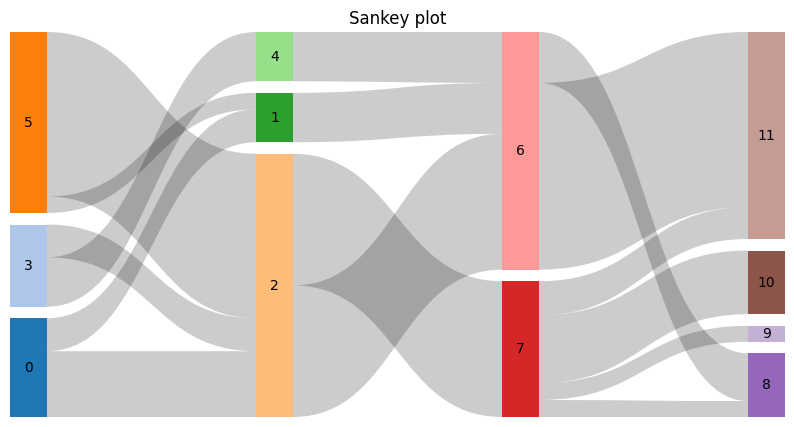

In [2]:
data = [
    [(0, 2, 20), (0, 1, 10), (3, 4, 15), (3, 2, 10), (5, 1, 5), (5, 2, 50)],
    [(2, 6, 40), (1, 6, 15), (2, 7, 40), (4, 6, 15)],
    [(7, 8, 5), (7, 9, 5), (7, 10, 20), (7, 11, 10), (6, 11, 55), (6, 8, 15)],
]

fig, ax = plt.subplots(figsize=(10, 5))
sankey(
    data=data,
    cmap="tab20",
    annotate_columns="index",
    ax=ax,
    title="Sankey plot",
    spacing=0.03,
)

<Axes: title={'center': 'Sankey plot'}>

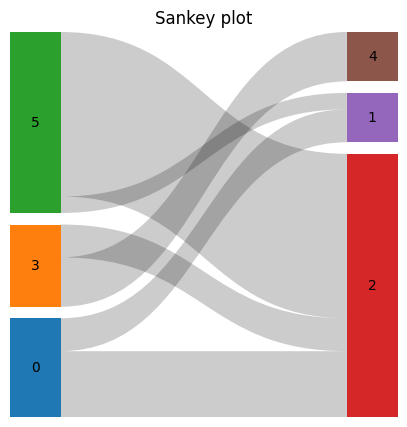

In [3]:
data = [
    [
        (0, 2, 20),
        (0, 1, 10),
        (3, 4, 15),
        (3, 2, 10),
        (5, 1, 5),
        (5, 2, 50),
    ],
]

fig, ax = plt.subplots(figsize=(5, 5))
sankey(
    data=data,
    cmap="tab10",
    annotate_columns="index",
    ax=ax,
    title="Sankey plot",
    spacing=0.03,
)

<Axes: title={'center': 'Sankey plot'}>

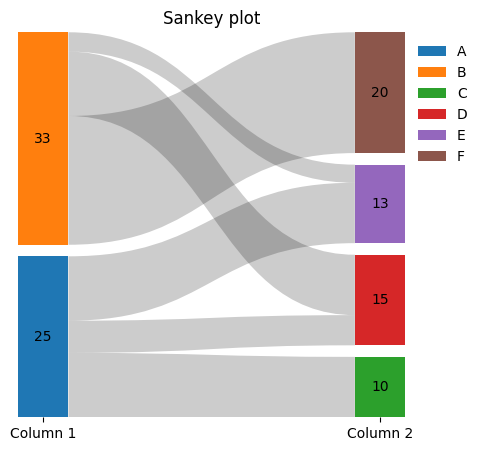

In [4]:
data = [
    [10, 0, 5, 10],
    [0, 20, 10, 3],
]

fig, ax = plt.subplots(figsize=(5, 5))
sankey(
    data=[from_matrix(data)],
    cmap="tab10",
    annotate_columns="weight",
    title="Sankey plot",
    spacing=0.03,
    ax=ax,
    show_legend=True,
    legend_labels=["A", "B", "C", "D", "E", "F"],
    column_labels=["Column 1", "Column 2"],
)

In [5]:
from matplotlib import colors
import re

In [6]:
from matplotlib_sankey._utils import isinstance_list_of


In [7]:
from typing import Any
from matplotlib_sankey._colors import is_hex_color, is_colormap, is_color


def unify_color(color: Any) -> tuple[float, float, float]:
    """Unify color objects to tuple of floats."""
    if isinstance(color, str):
        # Check if color is hex string
        if is_hex_color(color):
            return colors.to_rgb(color)

        # Check if color is named matplotlib color
        # named_colors = {
        #     **colors.TABLEAU_COLORS,
        #     **colors.BASE_COLORS,
        #     **colors.CSS4_COLORS,
        #     **colors.XKCD_COLORS,
        # }
        named_colors = colors.get_named_colors_mapping()

        if color in named_colors.keys():
            named_color_value = named_colors[color]

            # Check if named color provides hex string or float tuple
            if is_hex_color(named_color_value):
                return colors.to_rgb(named_color_value)

            # Check if float tuple has correct format
            assert all(isinstance(i, int | float) and i >= 0 and i <= 1 for i in named_color_value)

    elif isinstance(color, list | tuple | set):
        # Check if value is list|tuple of int|float
        color = list(color)

        if len(color) == 3:
            assert isinstance_list_of(color, int | float)

            # Check if values are between 0-255 or between 0-1
            if sum(color) > 3:
                return [c / 255 for c in color]
            return color

    raise ValueError("Argument 'color' is invalid.")

In [8]:
unify_color("tab:red"), unify_color([23, 255, 159])

((0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 [0.09019607843137255, 1.0, 0.6235294117647059])

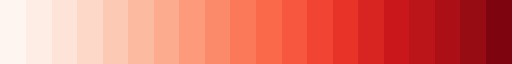

In [9]:
from matplotlib import colormaps


def colormap_to_list(
    name: str,
    num: int | None = None,
    rollover: bool = True,
    norm_vmin: int = 0,
) -> list[tuple[float, float, float]]:
    """Generate list of color tuples from cmap name."""
    assert is_colormap(name)

    cmap = colormaps.get_cmap(name)

    max_iter = cmap.N

    if num is not None:
        max_iter = num

    norm = colors.Normalize(vmin=norm_vmin, vmax=cmap.N)

    if cmap.N == 256:
        # Norm sequencial colors
        norm = colors.Normalize(vmin=norm_vmin, vmax=max_iter % cmap.N)

    if rollover is True:
        return [tuple(float(c) for c in cmap(norm(i % cmap.N))[:3]) for i in range(max_iter)]
    return [tuple(float(c) for c in cmap(norm(i))[:3]) for i in range(max_iter)]


colors.ListedColormap(colormap_to_list("Reds", 20))